In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the project root to the path
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), '..'))

# Import using pipeline architecture
import hidden_regime as hr
from hidden_regime.config.observation import FinancialObservationConfig
from hidden_regime.config.data import FinancialDataConfig
from hidden_regime.config.model import HMMConfig

In [48]:
TICKER = 'AMD'
N_STATES = 3
START_DATE = "2023-01-01" 
END_DATE = "2024-01-01"

In [49]:
pipeline = hr.create_financial_pipeline(
            ticker=TICKER,
            n_states=N_STATES,
            start_date=START_DATE,
            end_date=END_DATE,
            observations_config=FinancialObservationConfig.create_minimal_financial(), # log_return only            
        )

In [50]:
rpt = pipeline.update()

Training on 249 observations (removed 0 NaN values)


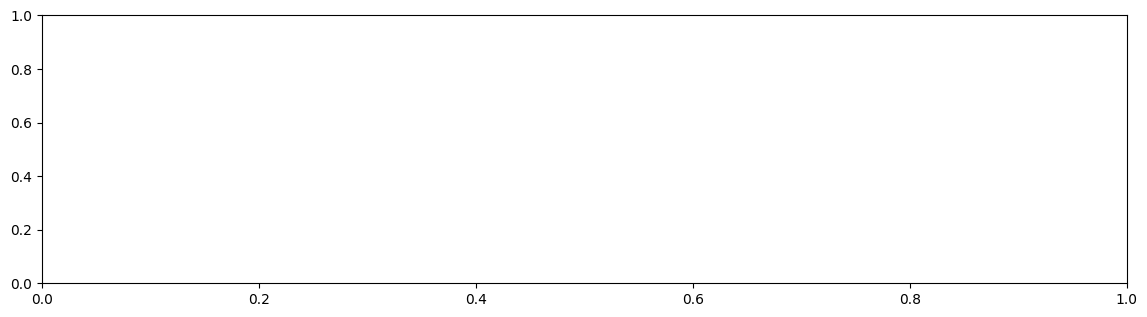

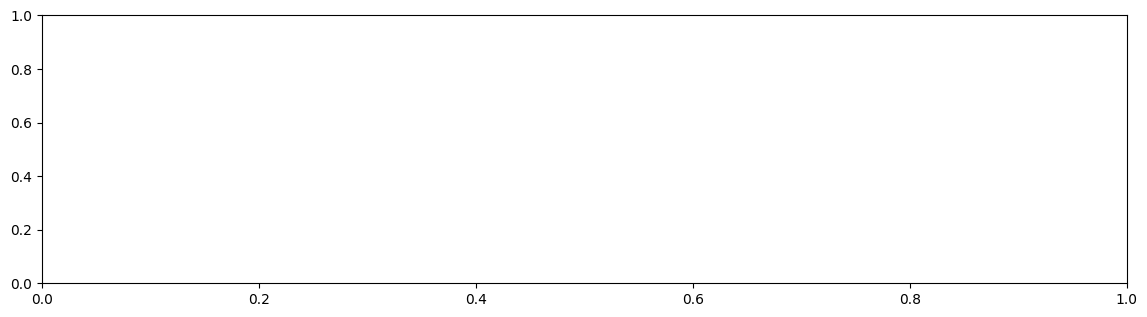

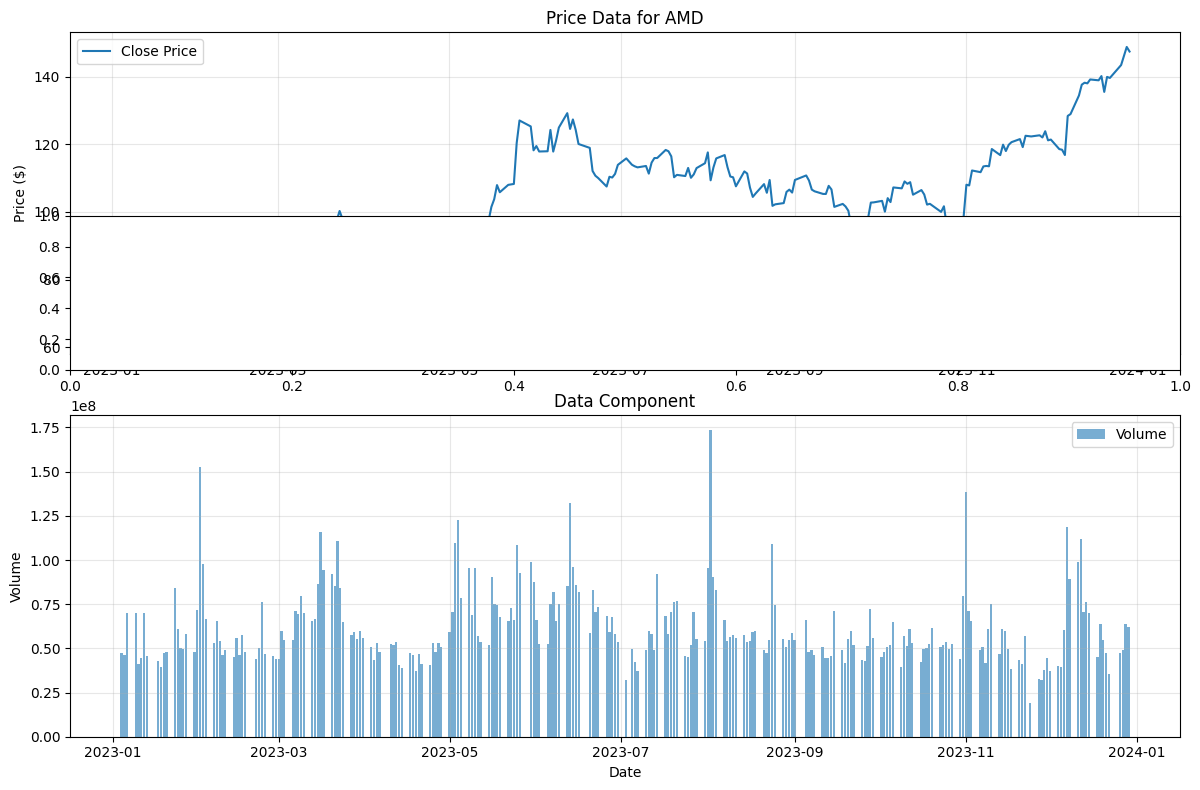

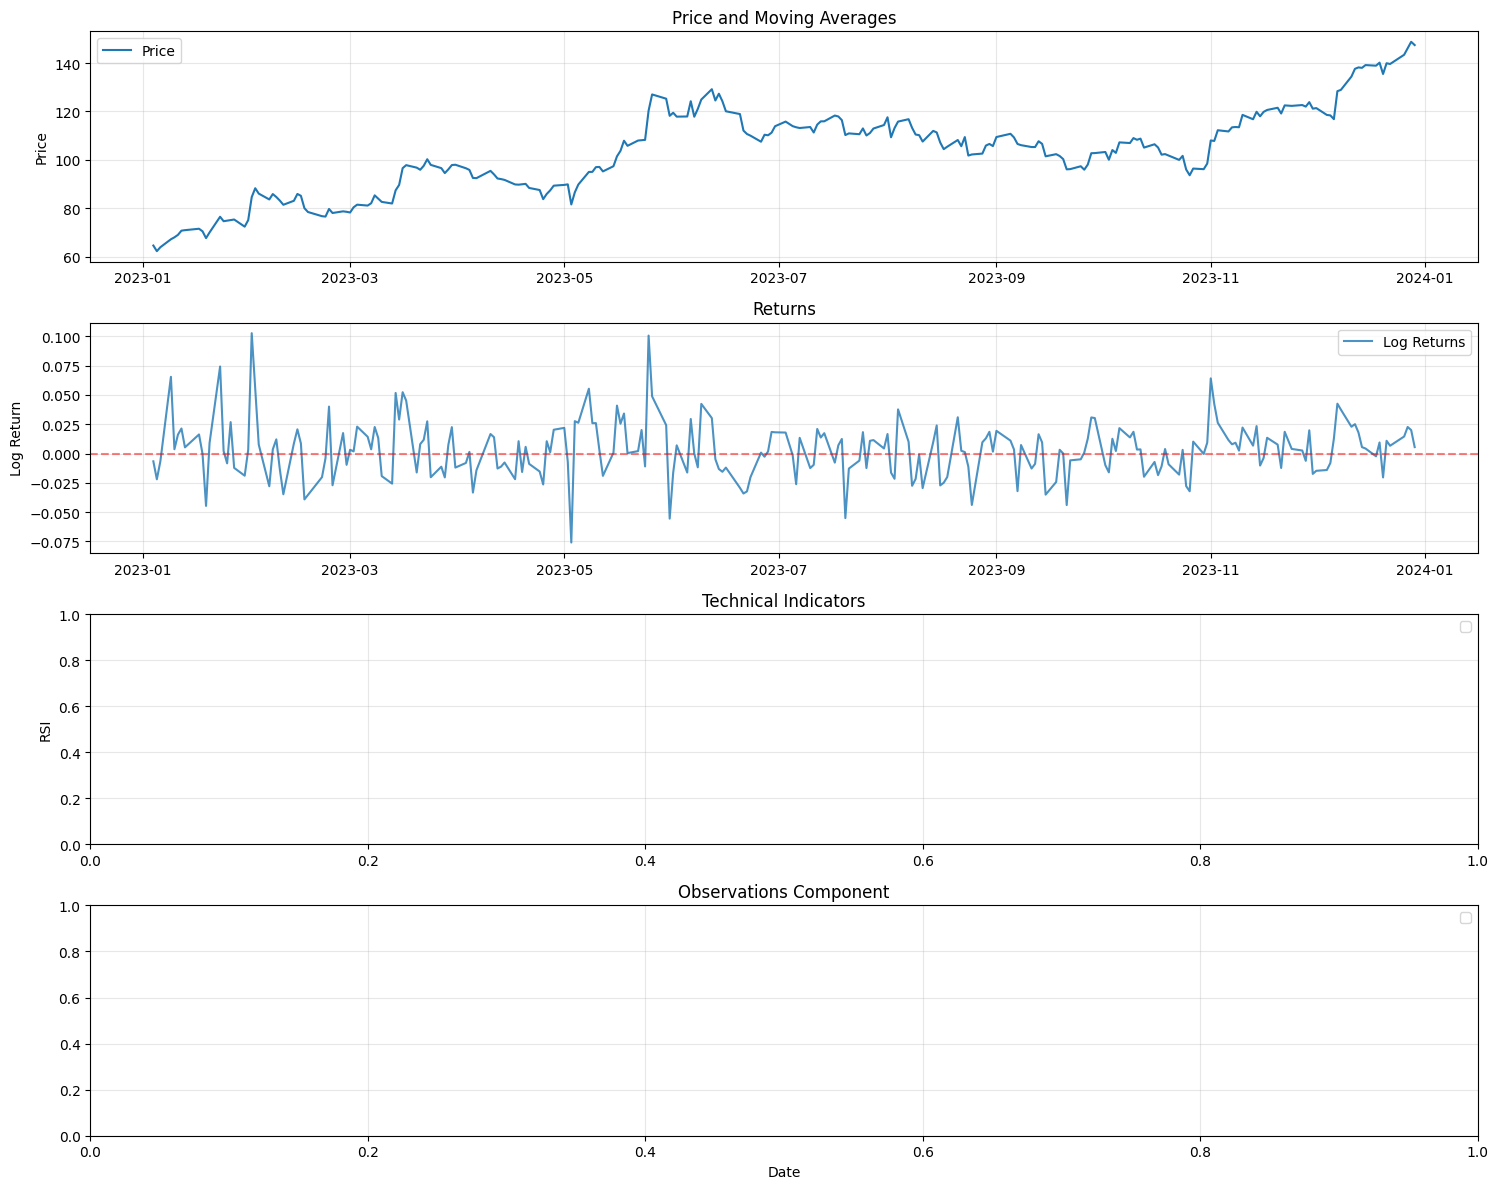

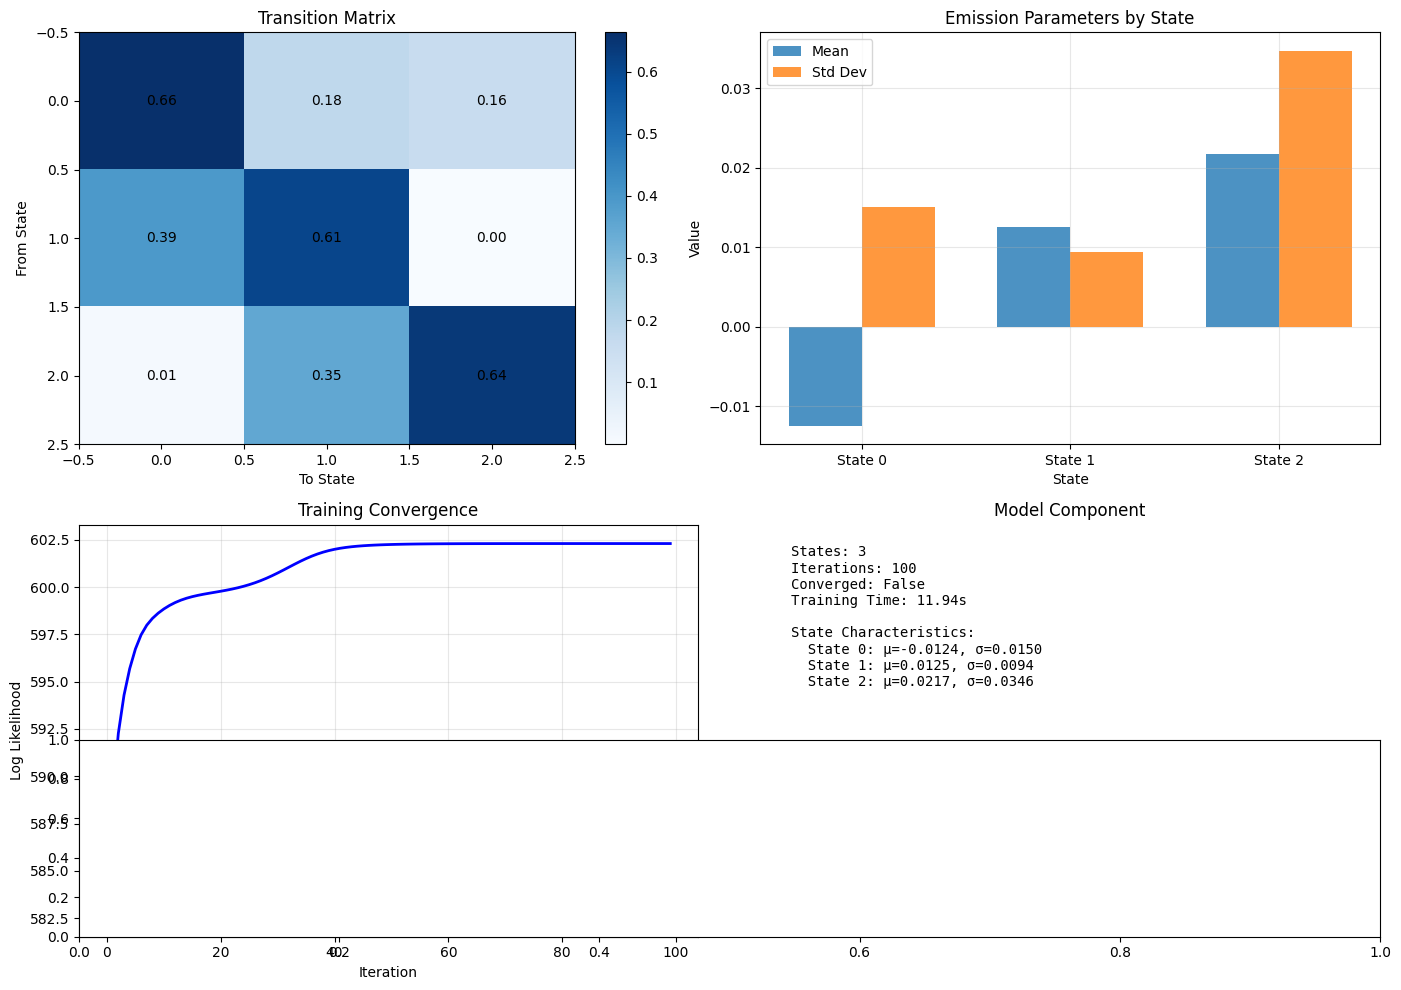

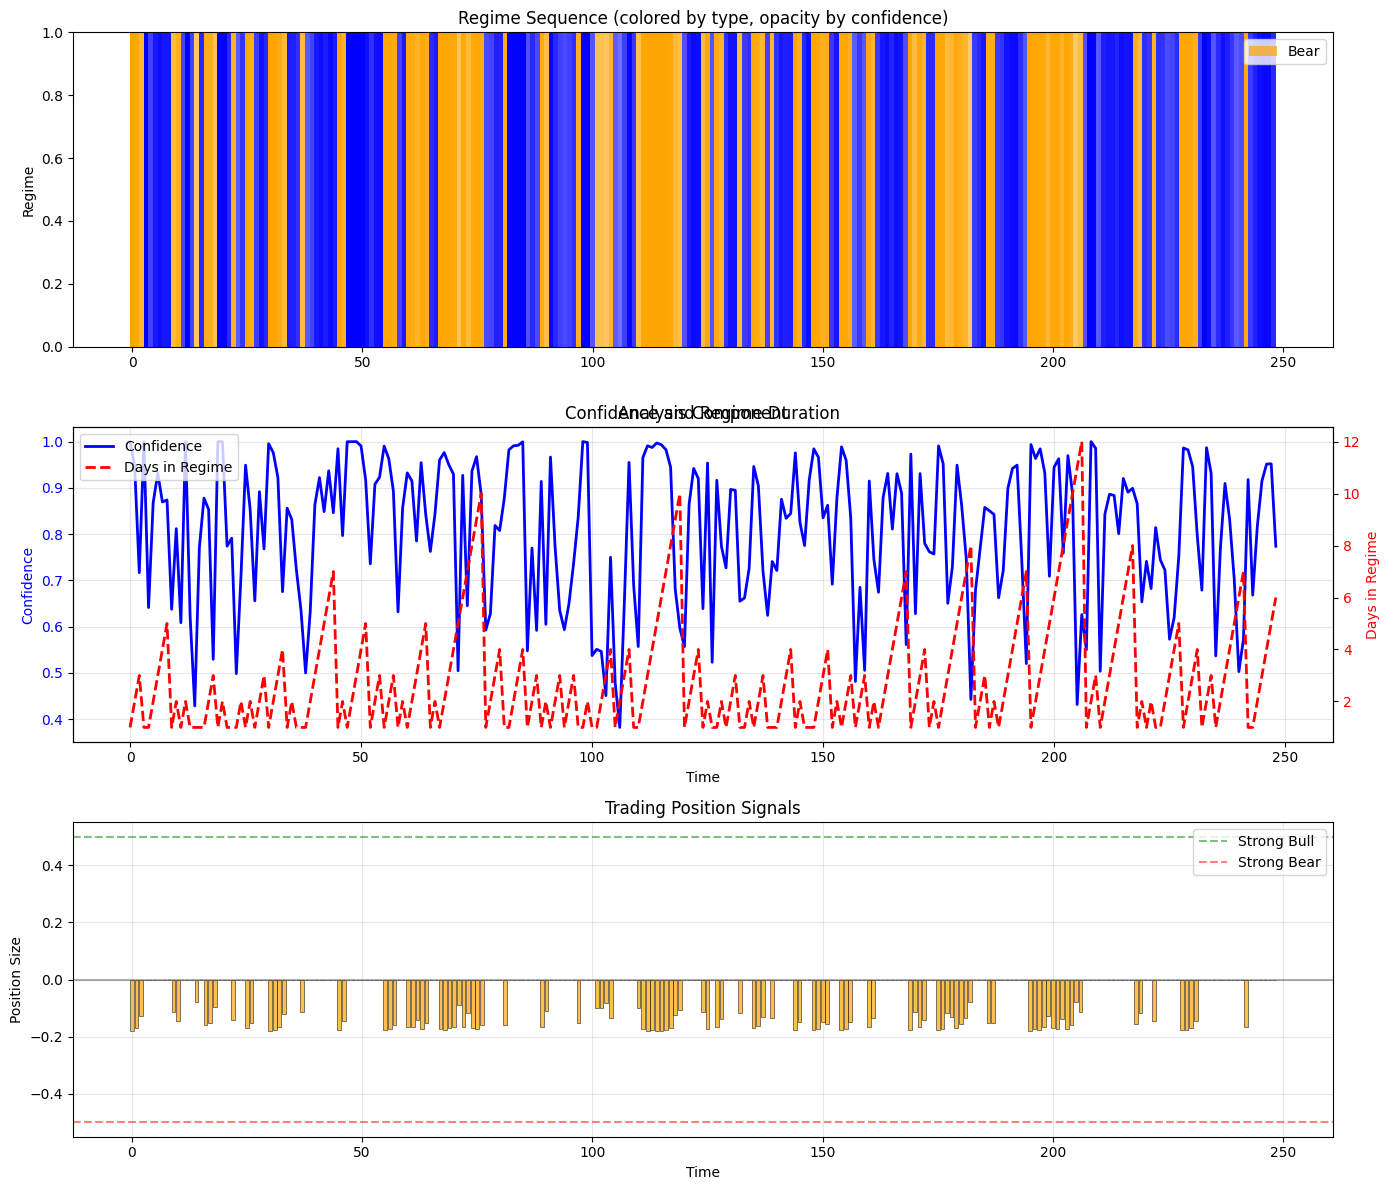

In [51]:
pipeline.plot()

In [52]:
analysis_output = pipeline.get_component_output('analysis')

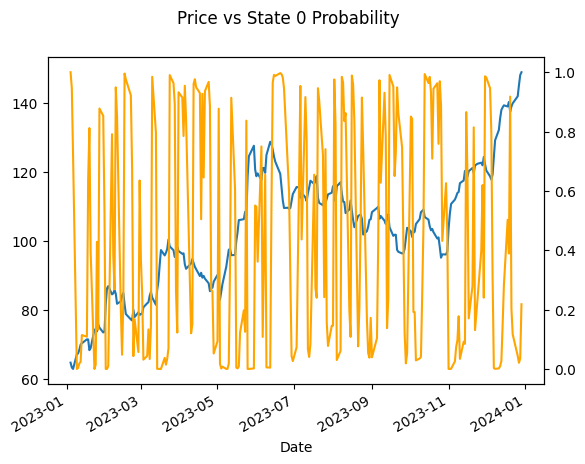

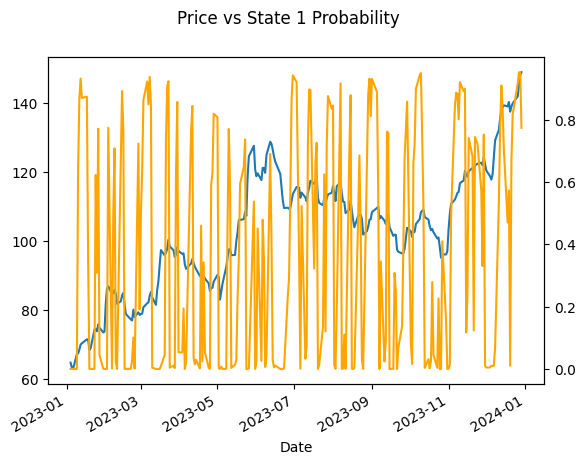

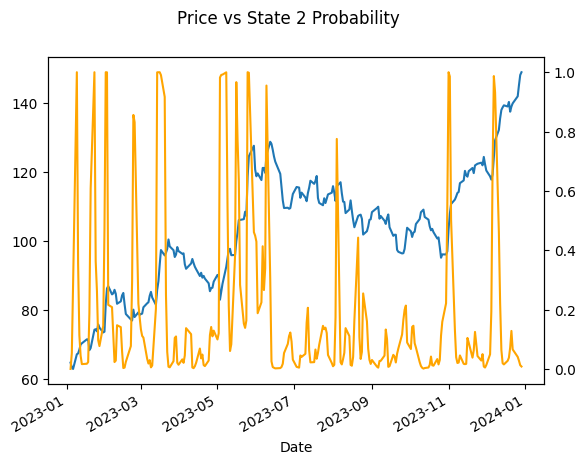

In [53]:
for n in range(N_STATES):
    fig = plt.figure()
    ax = pipeline.data_output.price.plot.line()
    ax2 = ax.twinx()
    pipeline.analysis_output[f'state_{n}_prob'].plot.line(ax=ax2, color='orange')
    fig.suptitle(f'Price vs State {n} Probability')

In [54]:
pipeline.model.emission_means_

array([-0.01240081,  0.01251686,  0.02172667])

In [55]:
analysis_output['regime_name'].values

array(['Bear', 'Bear', 'Bear', 'Strong Bull', 'Weak Bull', 'Weak Bull',
       'Weak Bull', 'Weak Bull', 'Weak Bull', 'Bear', 'Bear',
       'Strong Bull', 'Strong Bull', 'Weak Bull', 'Bear', 'Weak Bull',
       'Bear', 'Bear', 'Bear', 'Strong Bull', 'Strong Bull', 'Weak Bull',
       'Bear', 'Weak Bull', 'Weak Bull', 'Bear', 'Bear', 'Weak Bull',
       'Weak Bull', 'Weak Bull', 'Bear', 'Bear', 'Bear', 'Bear',
       'Strong Bull', 'Strong Bull', 'Weak Bull', 'Bear', 'Weak Bull',
       'Weak Bull', 'Weak Bull', 'Weak Bull', 'Weak Bull', 'Weak Bull',
       'Weak Bull', 'Bear', 'Bear', 'Strong Bull', 'Strong Bull',
       'Strong Bull', 'Strong Bull', 'Strong Bull', 'Weak Bull',
       'Weak Bull', 'Weak Bull', 'Bear', 'Bear', 'Bear', 'Weak Bull',
       'Weak Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Weak Bull',
       'Weak Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear',
       'Bear', 'Bear', 'Bear', 'Bear', 'Weak Bull', 'Weak Bull',
       'Weak Bull', 'Weak Bull', 'Be